In [1]:
library(data.table)
library(agricolae)
data(sweetpotato)

Warning message:
"package 'agricolae' was built under R version 3.3.3"

In [4]:
attach(sweetpotato)

comparison<-waerden.test(yield,virus,alpha=0.01,group=TRUE)

print(comparison)

The following objects are masked from sweetpotato (pos = 3):

    virus, yield



$statistics
     Chisq Df    p.chisq  t.value      MSD
  8.409979  3 0.03825667 3.355387 1.322487

$parameters
     test name.t ntr alpha
  Waerden  virus   4  0.01

$means
      yield normalScore      std r  Min  Max   Q25  Q50   Q75
cc 24.40000  -0.2328353 3.609709 3 21.7 28.5 22.35 23.0 25.75
fc 12.86667  -1.0601764 2.159475 3 10.6 14.9 11.85 13.1 14.00
ff 36.33333   0.6885684 7.333030 3 28.0 41.8 33.60 39.2 40.50
oo 36.90000   0.6044433 4.300000 3 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
        score groups
ff  0.6885684      a
oo  0.6044433      a
cc -0.2328353     ab
fc -1.0601764      b

attr(,"class")
[1] "group"


In [5]:
# The above information made zero sense to me, but if we restate the command 
# using the R with funtion it evalueates it more straightforward 
OutWaerden<-with(sweetpotato,waerden.test(yield,virus,alpha=0.01,group=TRUE,console=TRUE))


Study: yield ~ virus
Van der Waerden (Normal Scores) test's

Value : 8.409979
Pvalue: 0.03825667
Degrees of Freedom:  3 

virus,  means of the normal score

        yield       std r
cc -0.2328353 0.3028832 3
fc -1.0601764 0.3467934 3
ff  0.6885684 0.7615582 3
oo  0.6044433 0.3742929 3

Post Hoc Analysis

Alpha: 0.01 ; DF Error: 8 

Minimum Significant Difference: 1.322487 

Treatments with the same letter are not significantly different.

Means of the normal score

        score groups
ff  0.6885684      a
oo  0.6044433      a
cc -0.2328353     ab
fc -1.0601764      b


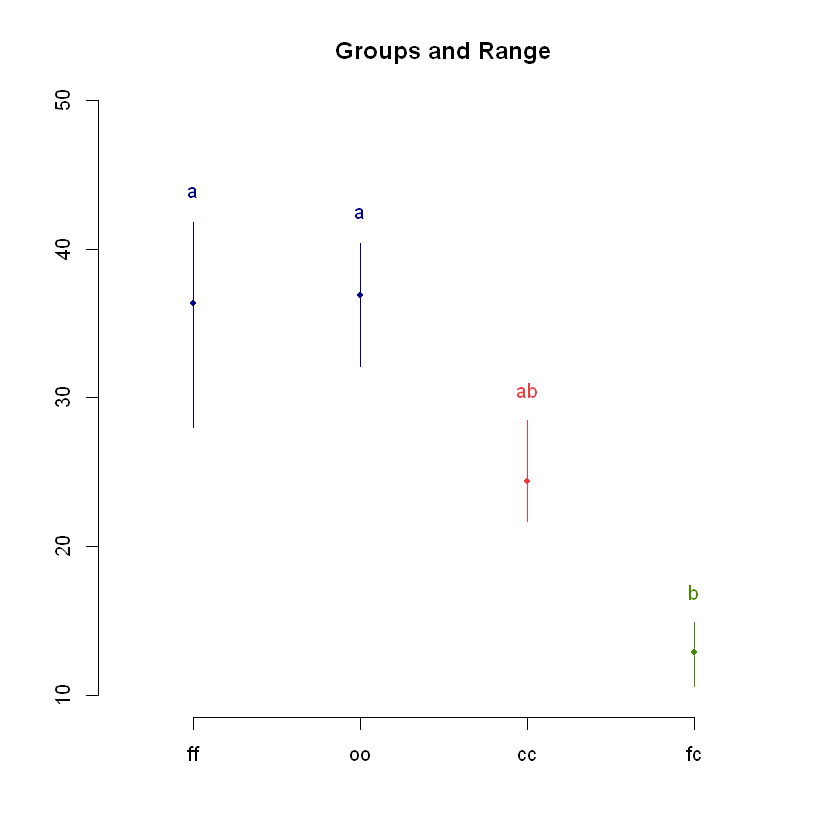

In [6]:
plot(OutWaerden)

In [7]:
# As it explains "treatments with the same names are NOT sig. different
# FF and OO are not significantly different
# FC is significantly different from both FF and OO
# CC is not significantly different from any


# If we change the parameter group to =FALSE we can
# see the comparison probabilites

out<-with(sweetpotato,waerden.test(yield,virus,group=FALSE,console=TRUE))


Study: yield ~ virus
Van der Waerden (Normal Scores) test's

Value : 8.409979
Pvalue: 0.03825667
Degrees of Freedom:  3 

virus,  means of the normal score

        yield       std r
cc -0.2328353 0.3028832 3
fc -1.0601764 0.3467934 3
ff  0.6885684 0.7615582 3
oo  0.6044433 0.3742929 3

Post Hoc Analysis

Comparison between treatments
mean of the normal score

        difference pvalue signif.         LCL         UCL
cc - fc  0.8273411 0.0690       . -0.08154345  1.73622564
cc - ff -0.9214037 0.0476       * -1.83028827 -0.01251917
cc - oo -0.8372786 0.0664       . -1.74616316  0.07160593
fc - ff -1.7487448 0.0022      ** -2.65762936 -0.83986026
fc - oo -1.6646197 0.0029      ** -2.57350426 -0.75573516
ff - oo  0.0841251 0.8363         -0.82475944  0.99300965


In [ ]:
# Now we have the p values showing the significance 